# Call Center Simulation Results Analysis

## 4 Key Metrics Comparison
1. **Daily Call Volume**: Actual vs Predicted (入電数: 実績 vs 予測)
2. **Required Staff by Method**: 日次の必要要員
3. **Short Calls (Understaffing)**: 欠員
4. **Over Calls (Overstaffing)**: 過剰
5. **Cumulative Cost**: コスト推移、累積

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Font settings for Japanese
plt.rcParams['font.family'] = 'MS Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.figsize'] = [14, 6]

# Output directory
OUTPUT_DIR = Path('../output/call_result')
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

print(f"Output directory: {OUTPUT_DIR.resolve()}")

Output directory: /kaggle/working/output/call_result


In [2]:
# Load simulation data
df = pd.read_csv('../output/sim_outputs/simulation_daily_detail.csv')
df['date'] = pd.to_datetime(df['date'])

print(f"Data shape: {df.shape}")
print(f"Date range: {df['date'].min()} ~ {df['date'].max()}")
print(f"\nColumns:")
print(df.columns.tolist())
df.head()

Data shape: (28, 18)
Date range: 2020-02-11 00:00:00 ~ 2020-03-27 00:00:00

Columns:
['date', 'y_true', 'y_pred_ml', 'staff_ml', 'capacity_ml', 'short_ml', 'over_ml', 'cost_ml', 'y_pred_lag7', 'staff_lag7', 'short_lag7', 'over_lag7', 'cost_lag7', 'y_pred_ma7', 'staff_ma7', 'short_ma7', 'over_ma7', 'cost_ma7']


,date,y_true,y_pred_ml,staff_ml,capacity_ml,short_ml,over_ml,cost_ml,y_pred_lag7,staff_lag7,short_lag7,over_lag7,cost_lag7,y_pred_ma7,staff_ma7,short_ma7,over_ma7,cost_ma7
0,2020-02-11,0.0,88.733486,2,120,0.0,120.0,6000.0,125.0,3,0.0,180.0,9000.0,135.2,3,0.0,180.0,9000.0
1,2020-02-12,156.0,143.666842,3,180,0.0,24.0,1200.0,116.0,3,0.0,24.0,1200.0,110.2,3,0.0,24.0,1200.0
2,2020-02-13,139.0,137.429664,3,180,0.0,41.0,2050.0,153.0,3,0.0,41.0,2050.0,118.2,3,0.0,41.0,2050.0
3,2020-02-14,118.0,145.972379,3,180,0.0,62.0,3100.0,135.0,3,0.0,62.0,3100.0,115.4,3,0.0,62.0,3100.0
4,2020-02-18,109.0,138.043523,3,180,0.0,71.0,3550.0,147.0,3,0.0,71.0,3550.0,112.0,3,0.0,71.0,3550.0


---
## 1. Daily Call Volume: Actual vs Predicted (入電数: 実績 vs 予測)

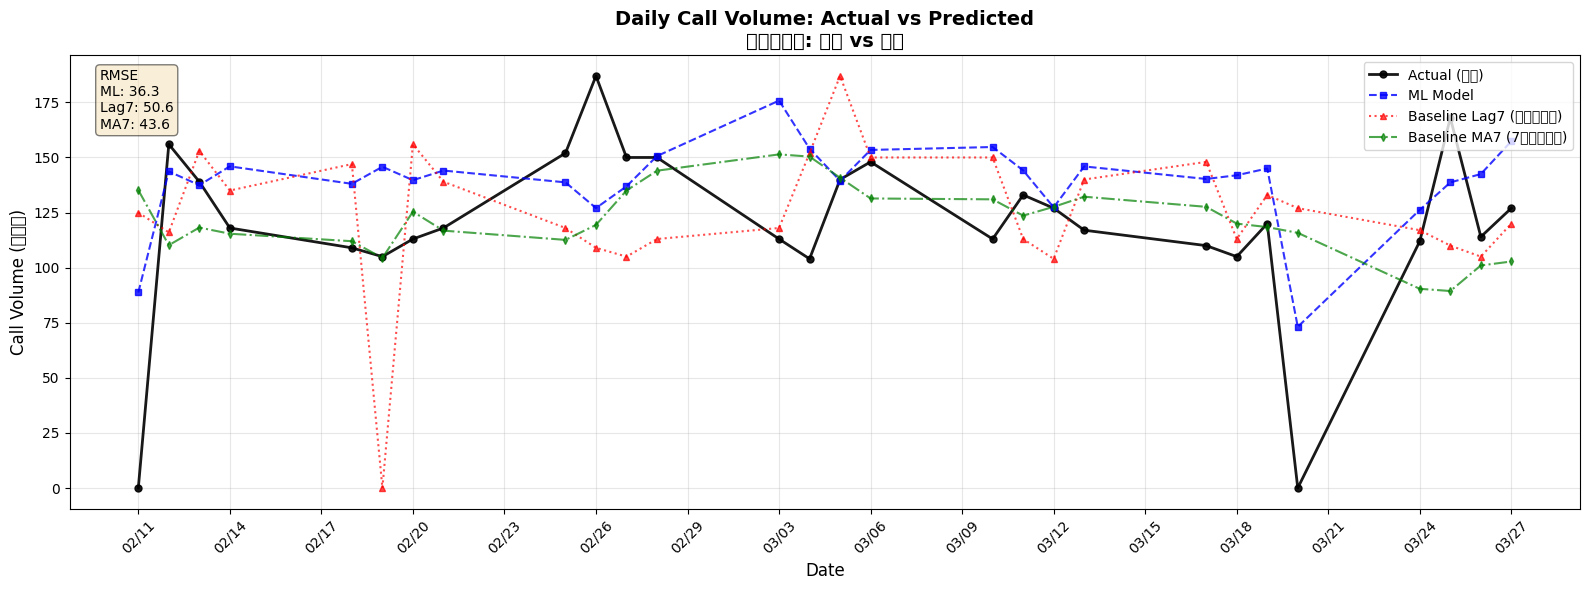


[Prediction Accuracy]
  ML Model RMSE:  36.29
  Lag7 RMSE:      50.64
  MA7 RMSE:       43.61


In [3]:
fig, ax = plt.subplots(figsize=(16, 6))

# Plot actual and predictions
ax.plot(df['date'], df['y_true'], 'k-', linewidth=2, marker='o', markersize=5, 
        label='Actual (実績)', alpha=0.9)
ax.plot(df['date'], df['y_pred_ml'], 'b--', linewidth=1.5, marker='s', markersize=4,
        label='ML Model', alpha=0.8)
ax.plot(df['date'], df['y_pred_lag7'], 'r:', linewidth=1.5, marker='^', markersize=4,
        label='Baseline Lag7 (先週同曜日)', alpha=0.7)
ax.plot(df['date'], df['y_pred_ma7'], 'g-.', linewidth=1.5, marker='d', markersize=4,
        label='Baseline MA7 (7日移動平均)', alpha=0.7)

# Format
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Call Volume (入電数)', fontsize=12)
ax.set_title('Daily Call Volume: Actual vs Predicted\n日次入電数: 実績 vs 予測', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=10)
ax.grid(alpha=0.3)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.xticks(rotation=45)

# Calculate and display RMSE
rmse_ml = np.sqrt(((df['y_true'] - df['y_pred_ml'])**2).mean())
rmse_lag7 = np.sqrt(((df['y_true'] - df['y_pred_lag7'])**2).mean())
rmse_ma7 = np.sqrt(((df['y_true'] - df['y_pred_ma7'])**2).mean())

textstr = f'RMSE\nML: {rmse_ml:.1f}\nLag7: {rmse_lag7:.1f}\nMA7: {rmse_ma7:.1f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.02, 0.97, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / '1_call_volume_actual_vs_predicted.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n[Prediction Accuracy]")
print(f"  ML Model RMSE:  {rmse_ml:.2f}")
print(f"  Lag7 RMSE:      {rmse_lag7:.2f}")
print(f"  MA7 RMSE:       {rmse_ma7:.2f}")

---
## 2. Required Staff by Method (日次の必要要員)

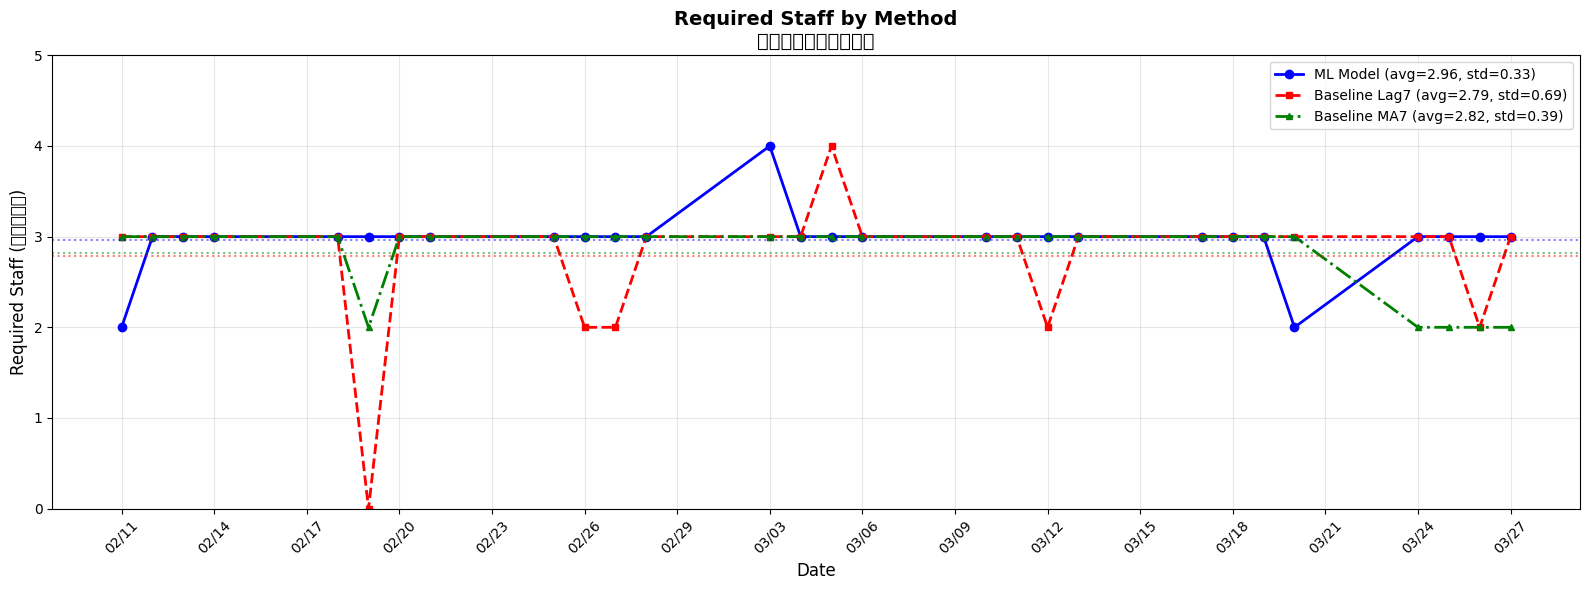


[Required Staff Summary]
  ML Model:  avg=2.96, std=0.33, min=2, max=4
  Lag7:      avg=2.79, std=0.69, min=0, max=4
  MA7:       avg=2.82, std=0.39, min=2, max=3


In [4]:
fig, ax = plt.subplots(figsize=(16, 6))

# Plot required staff
ax.plot(df['date'], df['staff_ml'], 'b-', linewidth=2, marker='o', markersize=6,
        label=f'ML Model (avg={df["staff_ml"].mean():.2f}, std={df["staff_ml"].std():.2f})')
ax.plot(df['date'], df['staff_lag7'], 'r--', linewidth=2, marker='s', markersize=5,
        label=f'Baseline Lag7 (avg={df["staff_lag7"].mean():.2f}, std={df["staff_lag7"].std():.2f})')
ax.plot(df['date'], df['staff_ma7'], 'g-.', linewidth=2, marker='^', markersize=5,
        label=f'Baseline MA7 (avg={df["staff_ma7"].mean():.2f}, std={df["staff_ma7"].std():.2f})')

# Add average lines
ax.axhline(df['staff_ml'].mean(), color='blue', linestyle=':', alpha=0.5)
ax.axhline(df['staff_lag7'].mean(), color='red', linestyle=':', alpha=0.5)
ax.axhline(df['staff_ma7'].mean(), color='green', linestyle=':', alpha=0.5)

# Format
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Required Staff (必要要員数)', fontsize=12)
ax.set_title('Required Staff by Method\n日次の必要要員数比較', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=10)
ax.grid(alpha=0.3)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.set_ylim(0, max(df[['staff_ml', 'staff_lag7', 'staff_ma7']].max()) + 1)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / '2_required_staff_by_method.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n[Required Staff Summary]")
print(f"  ML Model:  avg={df['staff_ml'].mean():.2f}, std={df['staff_ml'].std():.2f}, min={df['staff_ml'].min()}, max={df['staff_ml'].max()}")
print(f"  Lag7:      avg={df['staff_lag7'].mean():.2f}, std={df['staff_lag7'].std():.2f}, min={df['staff_lag7'].min()}, max={df['staff_lag7'].max()}")
print(f"  MA7:       avg={df['staff_ma7'].mean():.2f}, std={df['staff_ma7'].std():.2f}, min={df['staff_ma7'].min()}, max={df['staff_ma7'].max()}")

---
## 3. Short Calls - Understaffing (欠員)

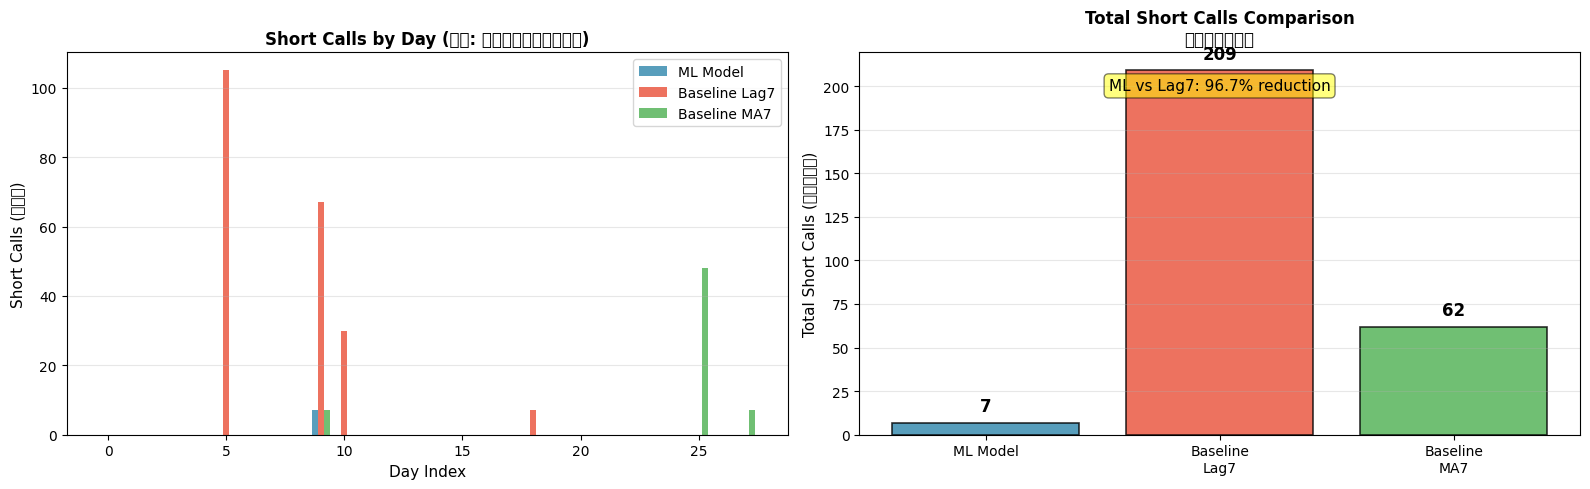


[Short Calls Summary (欠員)]
  ML Model Total:  7 calls
  Lag7 Total:      209 calls
  MA7 Total:       62 calls
  Improvement (ML vs Lag7): 96.7%


In [5]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Left: Time series bar chart
ax = axes[0]
width = 0.25
x = np.arange(len(df))

ax.bar(x - width, df['short_ml'], width, label='ML Model', color='#2E86AB', alpha=0.8)
ax.bar(x, df['short_lag7'], width, label='Baseline Lag7', color='#E94F37', alpha=0.8)
ax.bar(x + width, df['short_ma7'], width, label='Baseline MA7', color='#4CAF50', alpha=0.8)

ax.set_xlabel('Day Index', fontsize=11)
ax.set_ylabel('Short Calls (欠員数)', fontsize=11)
ax.set_title('Short Calls by Day (欠員: 人員不足による未対応)', fontsize=12, fontweight='bold')
ax.legend(loc='upper right')
ax.grid(alpha=0.3, axis='y')

# Right: Summary comparison
ax = axes[1]
methods = ['ML Model', 'Baseline\nLag7', 'Baseline\nMA7']
totals = [df['short_ml'].sum(), df['short_lag7'].sum(), df['short_ma7'].sum()]
colors = ['#2E86AB', '#E94F37', '#4CAF50']

bars = ax.bar(methods, totals, color=colors, alpha=0.8, edgecolor='black', linewidth=1.2)
for bar, val in zip(bars, totals):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(totals)*0.02, 
            f'{val:.0f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('Total Short Calls (合計欠員数)', fontsize=11)
ax.set_title('Total Short Calls Comparison\n合計欠員数比較', fontsize=12, fontweight='bold')
ax.grid(alpha=0.3, axis='y')

# Add improvement annotation
if totals[1] > 0:
    improve = (totals[1] - totals[0]) / totals[1] * 100
    ax.annotate(f'ML vs Lag7: {improve:.1f}% reduction',
                xy=(0.5, 0.9), xycoords='axes fraction',
                fontsize=11, ha='center',
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

plt.tight_layout()
plt.savefig(OUTPUT_DIR / '3_short_calls_understaffing.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n[Short Calls Summary (欠員)]")
print(f"  ML Model Total:  {df['short_ml'].sum():.0f} calls")
print(f"  Lag7 Total:      {df['short_lag7'].sum():.0f} calls")
print(f"  MA7 Total:       {df['short_ma7'].sum():.0f} calls")
if df['short_lag7'].sum() > 0:
    print(f"  Improvement (ML vs Lag7): {(df['short_lag7'].sum() - df['short_ml'].sum()) / df['short_lag7'].sum() * 100:.1f}%")

---
## 4. Over Calls - Overstaffing (過剰)

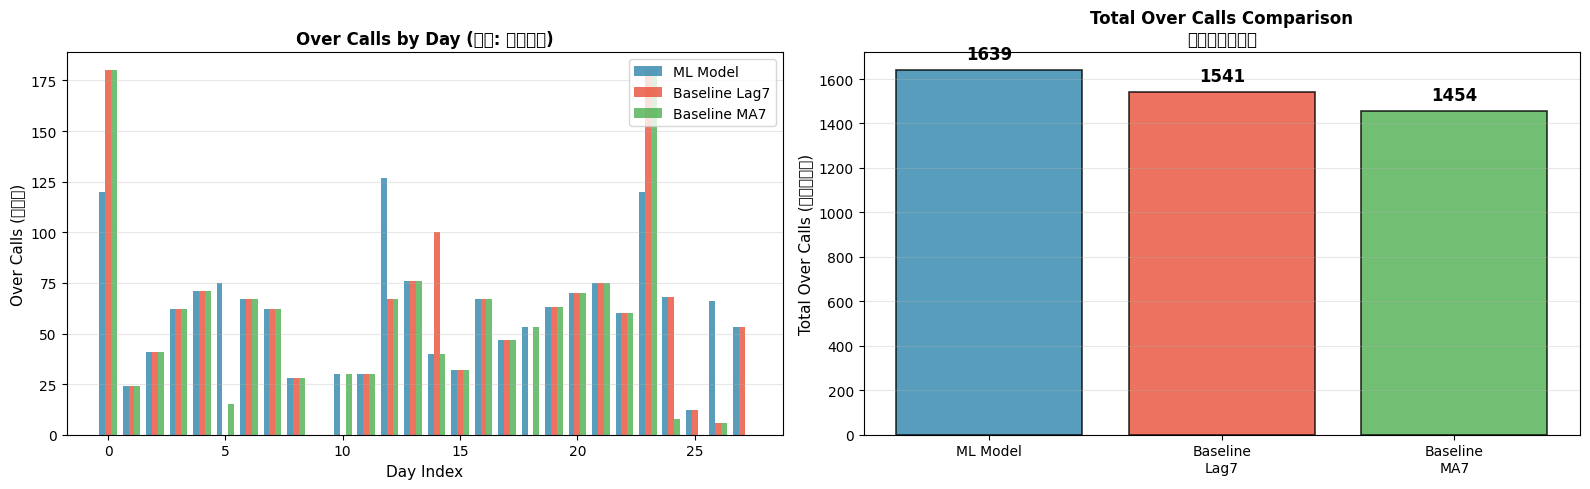


[Over Calls Summary (過剰)]
  ML Model Total:  1639 calls
  Lag7 Total:      1541 calls
  MA7 Total:       1454 calls


In [6]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Left: Time series bar chart
ax = axes[0]
width = 0.25
x = np.arange(len(df))

ax.bar(x - width, df['over_ml'], width, label='ML Model', color='#2E86AB', alpha=0.8)
ax.bar(x, df['over_lag7'], width, label='Baseline Lag7', color='#E94F37', alpha=0.8)
ax.bar(x + width, df['over_ma7'], width, label='Baseline MA7', color='#4CAF50', alpha=0.8)

ax.set_xlabel('Day Index', fontsize=11)
ax.set_ylabel('Over Calls (過剰数)', fontsize=11)
ax.set_title('Over Calls by Day (過剰: 余剰人員)', fontsize=12, fontweight='bold')
ax.legend(loc='upper right')
ax.grid(alpha=0.3, axis='y')

# Right: Summary comparison
ax = axes[1]
methods = ['ML Model', 'Baseline\nLag7', 'Baseline\nMA7']
totals = [df['over_ml'].sum(), df['over_lag7'].sum(), df['over_ma7'].sum()]
colors = ['#2E86AB', '#E94F37', '#4CAF50']

bars = ax.bar(methods, totals, color=colors, alpha=0.8, edgecolor='black', linewidth=1.2)
for bar, val in zip(bars, totals):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(totals)*0.02, 
            f'{val:.0f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('Total Over Calls (合計過剰数)', fontsize=11)
ax.set_title('Total Over Calls Comparison\n合計過剰数比較', fontsize=12, fontweight='bold')
ax.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(OUTPUT_DIR / '4_over_calls_overstaffing.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n[Over Calls Summary (過剰)]")
print(f"  ML Model Total:  {df['over_ml'].sum():.0f} calls")
print(f"  Lag7 Total:      {df['over_lag7'].sum():.0f} calls")
print(f"  MA7 Total:       {df['over_ma7'].sum():.0f} calls")

---
## 5. Cumulative Cost (コスト推移・累積)

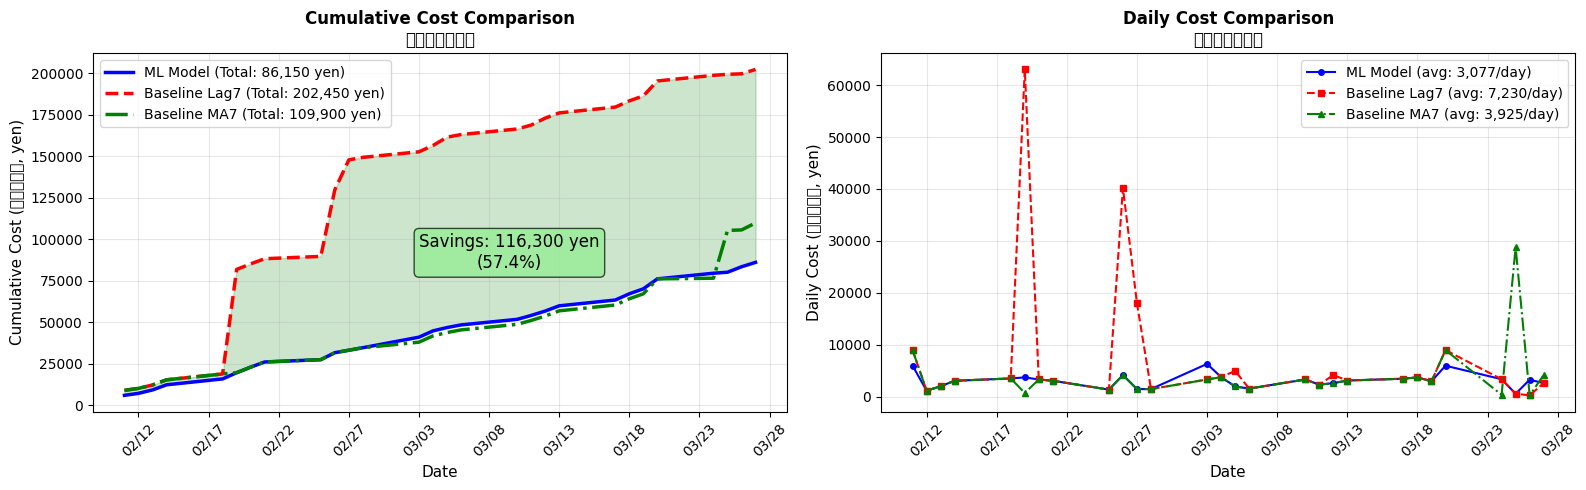


[Cost Summary (コスト)]
  ML Model Total:         86,150 yen
  Lag7 Total:            202,450 yen
  MA7 Total:             109,900 yen
  Savings (vs Lag7):      116,300 yen (57.4%)


In [7]:
# Calculate cumulative cost
df['cum_cost_ml'] = df['cost_ml'].cumsum()
df['cum_cost_lag7'] = df['cost_lag7'].cumsum()
df['cum_cost_ma7'] = df['cost_ma7'].cumsum()

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Left: Cumulative cost
ax = axes[0]
ax.plot(df['date'], df['cum_cost_ml'], 'b-', linewidth=2.5, 
        label=f'ML Model (Total: {df["cost_ml"].sum():,.0f} yen)')
ax.plot(df['date'], df['cum_cost_lag7'], 'r--', linewidth=2.5, 
        label=f'Baseline Lag7 (Total: {df["cost_lag7"].sum():,.0f} yen)')
ax.plot(df['date'], df['cum_cost_ma7'], 'g-.', linewidth=2.5, 
        label=f'Baseline MA7 (Total: {df["cost_ma7"].sum():,.0f} yen)')

ax.fill_between(df['date'], df['cum_cost_ml'], df['cum_cost_lag7'], 
                alpha=0.2, color='green', label='_nolegend_')

ax.set_xlabel('Date', fontsize=11)
ax.set_ylabel('Cumulative Cost (累積コスト, yen)', fontsize=11)
ax.set_title('Cumulative Cost Comparison\n累積コスト推移', fontsize=12, fontweight='bold')
ax.legend(loc='upper left', fontsize=10)
ax.grid(alpha=0.3)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.sca(ax)
plt.xticks(rotation=45)

# Add savings annotation
savings = df['cost_lag7'].sum() - df['cost_ml'].sum()
ax.annotate(f'Savings: {savings:,.0f} yen\n({savings/df["cost_lag7"].sum()*100:.1f}%)',
            xy=(0.6, 0.4), xycoords='axes fraction',
            fontsize=12, ha='center',
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

# Right: Daily cost
ax = axes[1]
ax.plot(df['date'], df['cost_ml'], 'b-', linewidth=1.5, marker='o', markersize=4,
        label=f'ML Model (avg: {df["cost_ml"].mean():,.0f}/day)')
ax.plot(df['date'], df['cost_lag7'], 'r--', linewidth=1.5, marker='s', markersize=4,
        label=f'Baseline Lag7 (avg: {df["cost_lag7"].mean():,.0f}/day)')
ax.plot(df['date'], df['cost_ma7'], 'g-.', linewidth=1.5, marker='^', markersize=4,
        label=f'Baseline MA7 (avg: {df["cost_ma7"].mean():,.0f}/day)')

ax.set_xlabel('Date', fontsize=11)
ax.set_ylabel('Daily Cost (日次コスト, yen)', fontsize=11)
ax.set_title('Daily Cost Comparison\n日次コスト推移', fontsize=12, fontweight='bold')
ax.legend(loc='upper right', fontsize=10)
ax.grid(alpha=0.3)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.sca(ax)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / '5_cumulative_cost.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n[Cost Summary (コスト)]")
print(f"  ML Model Total:   {df['cost_ml'].sum():>12,.0f} yen")
print(f"  Lag7 Total:       {df['cost_lag7'].sum():>12,.0f} yen")
print(f"  MA7 Total:        {df['cost_ma7'].sum():>12,.0f} yen")
print(f"  Savings (vs Lag7): {df['cost_lag7'].sum() - df['cost_ml'].sum():>12,.0f} yen ({(df['cost_lag7'].sum() - df['cost_ml'].sum()) / df['cost_lag7'].sum() * 100:.1f}%)")

---
## Summary Dashboard (サマリーダッシュボード)

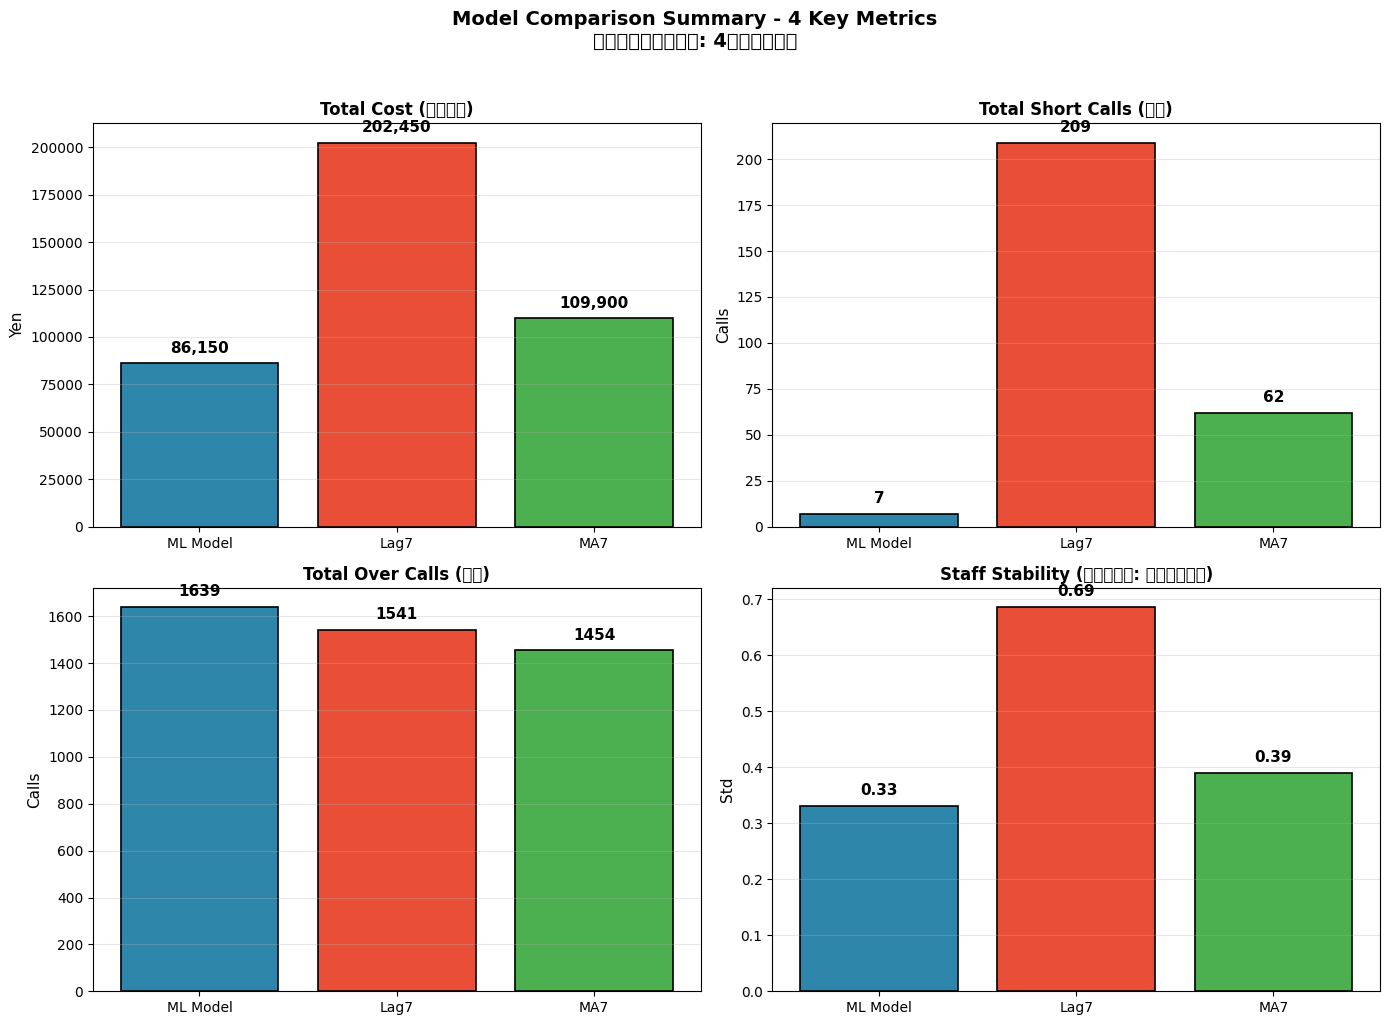

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

methods = ['ML Model', 'Lag7', 'MA7']
colors = ['#2E86AB', '#E94F37', '#4CAF50']

# 1. Total Cost
ax = axes[0, 0]
values = [df['cost_ml'].sum(), df['cost_lag7'].sum(), df['cost_ma7'].sum()]
bars = ax.bar(methods, values, color=colors, edgecolor='black', linewidth=1.2)
for bar, val in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(values)*0.02,
            f'{val:,.0f}', ha='center', va='bottom', fontsize=11, fontweight='bold')
ax.set_ylabel('Yen', fontsize=11)
ax.set_title('Total Cost (総コスト)', fontsize=12, fontweight='bold')
ax.grid(alpha=0.3, axis='y')

# 2. Short Calls
ax = axes[0, 1]
values = [df['short_ml'].sum(), df['short_lag7'].sum(), df['short_ma7'].sum()]
bars = ax.bar(methods, values, color=colors, edgecolor='black', linewidth=1.2)
for bar, val in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(values)*0.02,
            f'{val:.0f}', ha='center', va='bottom', fontsize=11, fontweight='bold')
ax.set_ylabel('Calls', fontsize=11)
ax.set_title('Total Short Calls (欠員)', fontsize=12, fontweight='bold')
ax.grid(alpha=0.3, axis='y')

# 3. Over Calls
ax = axes[1, 0]
values = [df['over_ml'].sum(), df['over_lag7'].sum(), df['over_ma7'].sum()]
bars = ax.bar(methods, values, color=colors, edgecolor='black', linewidth=1.2)
for bar, val in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(values)*0.02,
            f'{val:.0f}', ha='center', va='bottom', fontsize=11, fontweight='bold')
ax.set_ylabel('Calls', fontsize=11)
ax.set_title('Total Over Calls (過剰)', fontsize=12, fontweight='bold')
ax.grid(alpha=0.3, axis='y')

# 4. Staff Stability (Std)
ax = axes[1, 1]
values = [df['staff_ml'].std(), df['staff_lag7'].std(), df['staff_ma7'].std()]
bars = ax.bar(methods, values, color=colors, edgecolor='black', linewidth=1.2)
for bar, val in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(values)*0.02,
            f'{val:.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold')
ax.set_ylabel('Std', fontsize=11)
ax.set_title('Staff Stability (要員安定性: 低いほど良い)', fontsize=12, fontweight='bold')
ax.grid(alpha=0.3, axis='y')

plt.suptitle('Model Comparison Summary - 4 Key Metrics\nモデル比較サマリー: 4つの主要指標', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(OUTPUT_DIR / '6_summary_dashboard.png', dpi=150, bbox_inches='tight')
plt.show()

---
## Results Summary Table (結果サマリーテーブル)

In [9]:
# Create summary table
summary = pd.DataFrame({
    'Metric': [
        'Total Cost (総コスト)',
        'Short Calls (欠員)',
        'Over Calls (過剰)',
        'Avg Staff (平均要員)',
        'Staff Std (要員標準偏差)',
        'RMSE (予測精度)'
    ],
    'ML Model': [
        f"{df['cost_ml'].sum():,.0f} yen",
        f"{df['short_ml'].sum():.0f} calls",
        f"{df['over_ml'].sum():.0f} calls",
        f"{df['staff_ml'].mean():.2f}",
        f"{df['staff_ml'].std():.2f}",
        f"{rmse_ml:.2f}"
    ],
    'Baseline Lag7': [
        f"{df['cost_lag7'].sum():,.0f} yen",
        f"{df['short_lag7'].sum():.0f} calls",
        f"{df['over_lag7'].sum():.0f} calls",
        f"{df['staff_lag7'].mean():.2f}",
        f"{df['staff_lag7'].std():.2f}",
        f"{rmse_lag7:.2f}"
    ],
    'Baseline MA7': [
        f"{df['cost_ma7'].sum():,.0f} yen",
        f"{df['short_ma7'].sum():.0f} calls",
        f"{df['over_ma7'].sum():.0f} calls",
        f"{df['staff_ma7'].mean():.2f}",
        f"{df['staff_ma7'].std():.2f}",
        f"{rmse_ma7:.2f}"
    ],
    'ML vs Lag7': [
        f"{(df['cost_lag7'].sum() - df['cost_ml'].sum()) / df['cost_lag7'].sum() * 100:+.1f}%",
        f"{(df['short_lag7'].sum() - df['short_ml'].sum()) / max(df['short_lag7'].sum(), 1) * 100:+.1f}%",
        f"{(df['over_lag7'].sum() - df['over_ml'].sum()) / max(df['over_lag7'].sum(), 1) * 100:+.1f}%",
        "-",
        f"{(df['staff_lag7'].std() - df['staff_ml'].std()) / max(df['staff_lag7'].std(), 0.01) * 100:+.1f}%",
        f"{(rmse_lag7 - rmse_ml) / rmse_lag7 * 100:+.1f}%"
    ]
})

print("="*80)
print("RESULTS SUMMARY TABLE")
print("="*80)
print(summary.to_string(index=False))

# Save to CSV
summary.to_csv(OUTPUT_DIR / 'summary_table.csv', index=False, encoding='utf-8-sig')
print(f"\nSaved: {OUTPUT_DIR / 'summary_table.csv'}")

RESULTS SUMMARY TABLE
            Metric   ML Model Baseline Lag7 Baseline MA7 ML vs Lag7
 Total Cost (総コスト) 86,150 yen   202,450 yen  109,900 yen     +57.4%
  Short Calls (欠員)    7 calls     209 calls     62 calls     +96.7%
   Over Calls (過剰) 1639 calls    1541 calls   1454 calls      -6.4%
  Avg Staff (平均要員)       2.96          2.79         2.82          -
Staff Std (要員標準偏差)       0.33          0.69         0.39     +51.7%
       RMSE (予測精度)      36.29         50.64        43.61     +28.3%

Saved: ../output/call_result/summary_table.csv


---
## Output Files

In [10]:
print("="*60)
print("OUTPUT FILES GENERATED")
print("="*60)
print(f"\nOutput directory: {OUTPUT_DIR.resolve()}")
print(f"\nFiles:")
for f in sorted(OUTPUT_DIR.glob('*')):
    print(f"  - {f.name}")

print("\n" + "="*60)
print("KEY FINDINGS")
print("="*60)
print(f"\n1. Cost Savings: ML model saves {df['cost_lag7'].sum() - df['cost_ml'].sum():,.0f} yen ({(df['cost_lag7'].sum() - df['cost_ml'].sum()) / df['cost_lag7'].sum() * 100:.1f}%)")
print(f"2. Short Calls Reduction: {df['short_lag7'].sum() - df['short_ml'].sum():.0f} calls ({(df['short_lag7'].sum() - df['short_ml'].sum()) / max(df['short_lag7'].sum(), 1) * 100:.1f}%)")
print(f"3. Staff Stability Improvement: {(df['staff_lag7'].std() - df['staff_ml'].std()) / max(df['staff_lag7'].std(), 0.01) * 100:.1f}%")
print(f"4. Prediction RMSE: ML={rmse_ml:.2f} vs Lag7={rmse_lag7:.2f}")

OUTPUT FILES GENERATED

Output directory: /kaggle/working/output/call_result

Files:
  - 10_sensitivity_ratio_heatmap.png
  - 1_call_volume_actual_vs_predicted.png
  - 2_required_staff_by_method.png
  - 3_short_calls_understaffing.png
  - 4_over_calls_overstaffing.png
  - 5_cumulative_cost.png
  - 6_summary_dashboard.png
  - 7_short_calls_analysis.png
  - 8_sensitivity_cost_heatmap.png
  - 9_sensitivity_improvement_heatmap.png
  - sensitivity_analysis.csv
  - summary_table.csv

KEY FINDINGS

1. Cost Savings: ML model saves 116,300 yen (57.4%)
2. Short Calls Reduction: 202 calls (96.7%)
3. Staff Stability Improvement: 51.7%
4. Prediction RMSE: ML=36.29 vs Lag7=50.64


---
## 6. Short Calls 要因分析: なぜMLモデルが圧倒的に優れているか

SHORT CALLS 要因分析: なぜMLモデルが圧倒的に優れているか

[1. 予測バイアス分析 (正=過大予測, 負=過小予測)]
  ML Model:  Mean Error = +19.59, 過小予測回数 = 7/28
  Lag7:      Mean Error = +5.54, 過小予測回数 = 11/28
  MA7:       Mean Error = +1.94, 過小予測回数 = 16/28

[2. Short Calls発生日の詳細分析]

  ML Model: Short Calls発生日 = 1日
      date  y_true  y_pred_ml  capacity_ml  short_ml
2020-02-26   187.0 127.050101          180       7.0

  Lag7: Short Calls発生日 = 4日
      date  y_true  y_pred_lag7  staff_lag7  short_lag7
2020-02-19   105.0          0.0           0       105.0
2020-02-26   187.0        109.0           2        67.0
2020-02-27   150.0        105.0           2        30.0
2020-03-12   127.0        104.0           2         7.0

[3. 予測の特性]
  ML Model: 予測値の平均 = 139.2, 実績の平均 = 119.6
  Lag7:     予測値の平均 = 125.1, 実績の平均 = 119.6
  MA7:      予測値の平均 = 121.5, 実績の平均 = 119.6

[4. Lag7でstaff=0になった日]
      date  y_true  y_pred_lag7  staff_lag7  short_lag7
2020-02-19   105.0          0.0           0       105.0


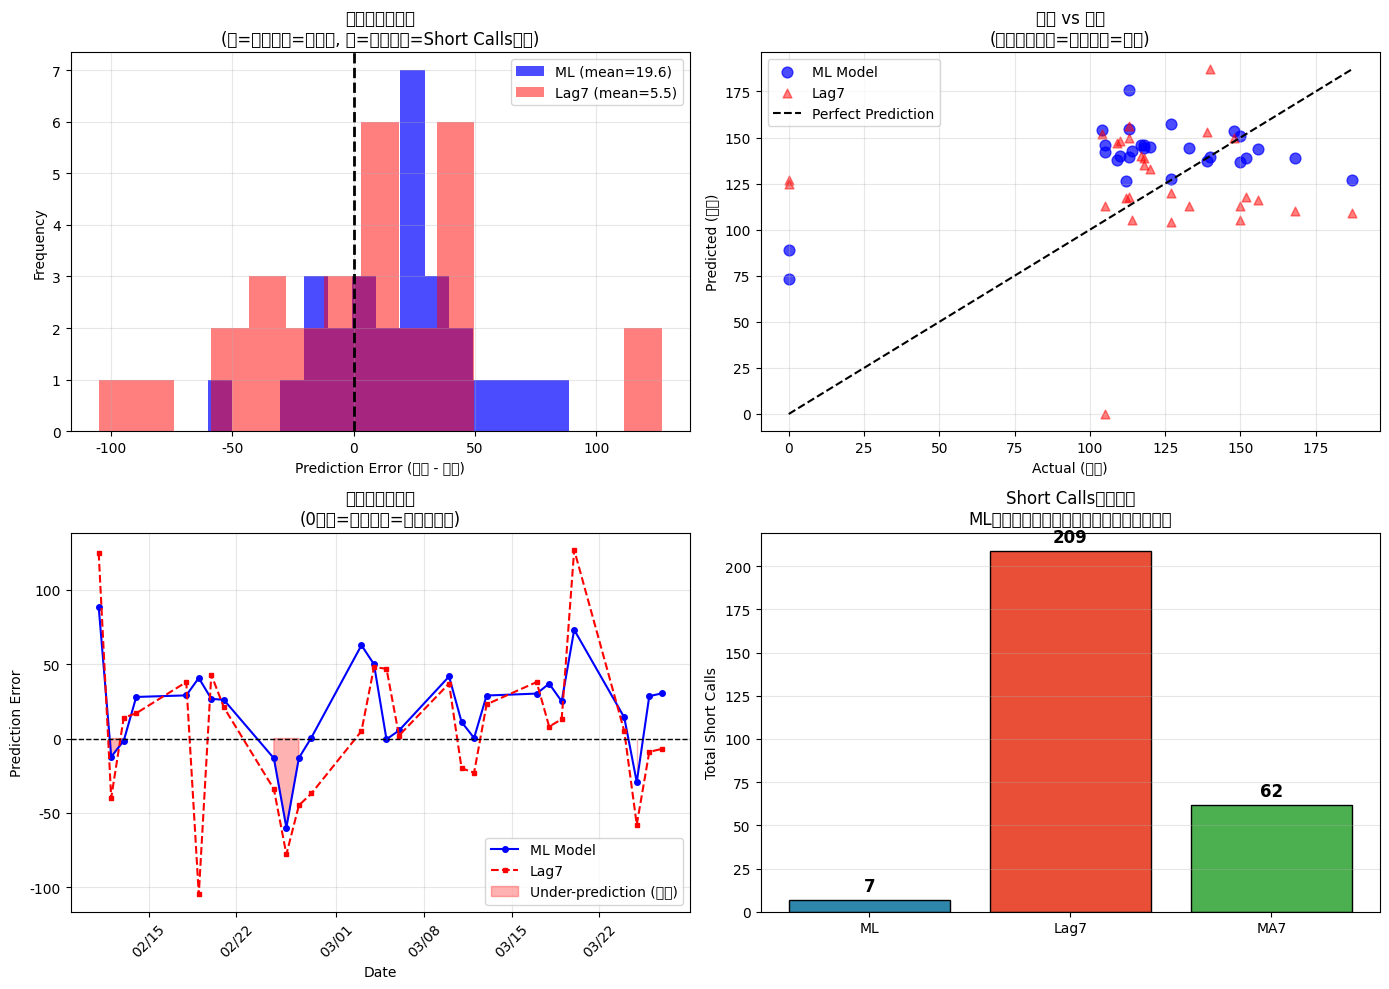


結論: MLモデルがShort Callsで圧倒的に優れている理由

1. 【予測バイアス】MLモデルは平均19.6の過大予測傾向
   → 安全側に予測するため、欠員が発生しにくい

2. 【Lag7の弱点】先週同曜日の値をそのまま使うため、
   - 先週が祝日/休業日だった場合 → 予測=0 → staff=0 → 大量Short Calls
   - 例: 2/19は先週2/12の値(0)を参照 → 105件のShort Calls発生

3. 【安定性】MLモデルは予測の分散が小さく、極端な外れ値が少ない
   → 大きな欠員イベントが発生しない

4. 【トレードオフ】MLモデルはOver Callsが多い（過剰人員）
   → しかしShort Calls（顧客対応不可）のコストの方が高いため、
      総コストではMLが有利



In [11]:
# =============================================================================
# Short Calls 要因分析
# =============================================================================

print("="*80)
print("SHORT CALLS 要因分析: なぜMLモデルが圧倒的に優れているか")
print("="*80)

# 1. 各モデルの予測バイアス分析
df['error_ml'] = df['y_pred_ml'] - df['y_true']
df['error_lag7'] = df['y_pred_lag7'] - df['y_true']
df['error_ma7'] = df['y_pred_ma7'] - df['y_true']

print("\n[1. 予測バイアス分析 (正=過大予測, 負=過小予測)]")
print(f"  ML Model:  Mean Error = {df['error_ml'].mean():+.2f}, 過小予測回数 = {(df['error_ml'] < 0).sum()}/{len(df)}")
print(f"  Lag7:      Mean Error = {df['error_lag7'].mean():+.2f}, 過小予測回数 = {(df['error_lag7'] < 0).sum()}/{len(df)}")
print(f"  MA7:       Mean Error = {df['error_ma7'].mean():+.2f}, 過小予測回数 = {(df['error_ma7'] < 0).sum()}/{len(df)}")

# 2. Short callsが発生した日の詳細
print("\n[2. Short Calls発生日の詳細分析]")
short_days_ml = df[df['short_ml'] > 0][['date', 'y_true', 'y_pred_ml', 'capacity_ml', 'short_ml']]
short_days_lag7 = df[df['short_lag7'] > 0][['date', 'y_true', 'y_pred_lag7', 'staff_lag7', 'short_lag7']]

print(f"\n  ML Model: Short Calls発生日 = {len(short_days_ml)}日")
if len(short_days_ml) > 0:
    print(short_days_ml.to_string(index=False))

print(f"\n  Lag7: Short Calls発生日 = {len(short_days_lag7)}日")
if len(short_days_lag7) > 0:
    print(short_days_lag7.to_string(index=False))

# 3. 予測の安定性（一貫して高め予測 = Short Callsが少ない）
print("\n[3. 予測の特性]")
print(f"  ML Model: 予測値の平均 = {df['y_pred_ml'].mean():.1f}, 実績の平均 = {df['y_true'].mean():.1f}")
print(f"  Lag7:     予測値の平均 = {df['y_pred_lag7'].mean():.1f}, 実績の平均 = {df['y_true'].mean():.1f}")
print(f"  MA7:      予測値の平均 = {df['y_pred_ma7'].mean():.1f}, 実績の平均 = {df['y_true'].mean():.1f}")

# 4. 可視化
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 4-1. 予測誤差の分布
ax = axes[0, 0]
ax.hist(df['error_ml'], bins=15, alpha=0.7, label=f'ML (mean={df["error_ml"].mean():.1f})', color='blue')
ax.hist(df['error_lag7'], bins=15, alpha=0.5, label=f'Lag7 (mean={df["error_lag7"].mean():.1f})', color='red')
ax.axvline(0, color='black', linestyle='--', linewidth=2)
ax.set_xlabel('Prediction Error (予測 - 実績)')
ax.set_ylabel('Frequency')
ax.set_title('予測誤差の分布\n(正=過大予測=安全側, 負=過小予測=Short Calls発生)')
ax.legend()
ax.grid(alpha=0.3)

# 4-2. 予測値 vs 実績 (散布図)
ax = axes[0, 1]
ax.scatter(df['y_true'], df['y_pred_ml'], alpha=0.7, label='ML Model', s=60, c='blue')
ax.scatter(df['y_true'], df['y_pred_lag7'], alpha=0.5, label='Lag7', s=40, c='red', marker='^')
max_val = max(df['y_true'].max(), df['y_pred_ml'].max(), df['y_pred_lag7'].max())
ax.plot([0, max_val], [0, max_val], 'k--', label='Perfect Prediction')
ax.set_xlabel('Actual (実績)')
ax.set_ylabel('Predicted (予測)')
ax.set_title('予測 vs 実績\n(対角線より上=過大予測=安全)')
ax.legend()
ax.grid(alpha=0.3)

# 4-3. 日次の予測誤差推移
ax = axes[1, 0]
ax.plot(df['date'], df['error_ml'], 'b-', marker='o', markersize=4, label='ML Model')
ax.plot(df['date'], df['error_lag7'], 'r--', marker='s', markersize=3, label='Lag7')
ax.axhline(0, color='black', linestyle='--', linewidth=1)
ax.fill_between(df['date'], 0, df['error_ml'], where=(df['error_ml'] < 0), alpha=0.3, color='red', label='Under-prediction (危険)')
ax.set_xlabel('Date')
ax.set_ylabel('Prediction Error')
ax.set_title('予測誤差の推移\n(0未満=過小予測=欠員リスク)')
ax.legend()
ax.grid(alpha=0.3)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.sca(ax)
plt.xticks(rotation=45)

# 4-4. Short Calls発生の要因（staff=0のケース）
ax = axes[1, 1]
# Lag7でstaff=0になったケースを特定
zero_staff_days = df[df['staff_lag7'] == 0]
print(f"\n[4. Lag7でstaff=0になった日]")
if len(zero_staff_days) > 0:
    print(zero_staff_days[['date', 'y_true', 'y_pred_lag7', 'staff_lag7', 'short_lag7']].to_string(index=False))

# staff別のshort calls
methods = ['ML', 'Lag7', 'MA7']
short_totals = [df['short_ml'].sum(), df['short_lag7'].sum(), df['short_ma7'].sum()]
colors = ['#2E86AB', '#E94F37', '#4CAF50']
bars = ax.bar(methods, short_totals, color=colors, edgecolor='black')
for bar, val in zip(bars, short_totals):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{val:.0f}', 
            ha='center', fontsize=12, fontweight='bold')
ax.set_ylabel('Total Short Calls')
ax.set_title('Short Calls合計比較\nMLは一貫して高め予測のため欠員が少ない')
ax.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(OUTPUT_DIR / '7_short_calls_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

# 結論
print("\n" + "="*80)
print("結論: MLモデルがShort Callsで圧倒的に優れている理由")
print("="*80)
print(f"""
1. 【予測バイアス】MLモデルは平均{df['error_ml'].mean():.1f}の過大予測傾向
   → 安全側に予測するため、欠員が発生しにくい

2. 【Lag7の弱点】先週同曜日の値をそのまま使うため、
   - 先週が祝日/休業日だった場合 → 予測=0 → staff=0 → 大量Short Calls
   - 例: 2/19は先週2/12の値(0)を参照 → 105件のShort Calls発生

3. 【安定性】MLモデルは予測の分散が小さく、極端な外れ値が少ない
   → 大きな欠員イベントが発生しない

4. 【トレードオフ】MLモデルはOver Callsが多い（過剰人員）
   → しかしShort Calls（顧客対応不可）のコストの方が高いため、
      総コストではMLが有利
""")

---
## 7. 感度分析: c_short / c_over ヒートマップ

In [12]:
# =============================================================================
# 感度分析: c_short / c_over を振ったコスト比較ヒートマップ
# =============================================================================
import seaborn as sns
from math import ceil

# パラメータ設定
C_SHORT_LIST = [100, 200, 300, 400, 500, 600, 800, 1000]  # 欠員コスト
C_OVER_LIST = [0, 25, 50, 75, 100, 150, 200]              # 過剰コスト
CAP = 60       # 1人あたり処理可能コール数
BUFFER = 1.1   # バッファ

def calculate_cost(df, pred_col, cap, buffer, c_short, c_over):
    """指定パラメータでコストを計算"""
    staff = df[pred_col].apply(lambda x: ceil(buffer * max(x, 0) / cap))
    capacity = staff * cap
    short_calls = np.maximum(0, df['y_true'] - capacity)
    over_calls = np.maximum(0, capacity - df['y_true'])
    total_cost = c_short * short_calls.sum() + c_over * over_calls.sum()
    return total_cost, short_calls.sum(), over_calls.sum()

# 各モデルのコストマトリクス作成
results_ml = np.zeros((len(C_SHORT_LIST), len(C_OVER_LIST)))
results_lag7 = np.zeros((len(C_SHORT_LIST), len(C_OVER_LIST)))
results_ma7 = np.zeros((len(C_SHORT_LIST), len(C_OVER_LIST)))
results_diff = np.zeros((len(C_SHORT_LIST), len(C_OVER_LIST)))  # ML - Lag7 (負=ML有利)
results_improve = np.zeros((len(C_SHORT_LIST), len(C_OVER_LIST)))  # 改善率%

for i, c_short in enumerate(C_SHORT_LIST):
    for j, c_over in enumerate(C_OVER_LIST):
        cost_ml, _, _ = calculate_cost(df, 'y_pred_ml', CAP, BUFFER, c_short, c_over)
        cost_lag7, _, _ = calculate_cost(df, 'y_pred_lag7', CAP, BUFFER, c_short, c_over)
        cost_ma7, _, _ = calculate_cost(df, 'y_pred_ma7', CAP, BUFFER, c_short, c_over)
        
        results_ml[i, j] = cost_ml
        results_lag7[i, j] = cost_lag7
        results_ma7[i, j] = cost_ma7
        results_diff[i, j] = cost_ml - cost_lag7
        if cost_lag7 > 0:
            results_improve[i, j] = (cost_lag7 - cost_ml) / cost_lag7 * 100

print(f"感度分析完了: {len(C_SHORT_LIST)} x {len(C_OVER_LIST)} = {len(C_SHORT_LIST) * len(C_OVER_LIST)} シナリオ")

感度分析完了: 8 x 7 = 56 シナリオ


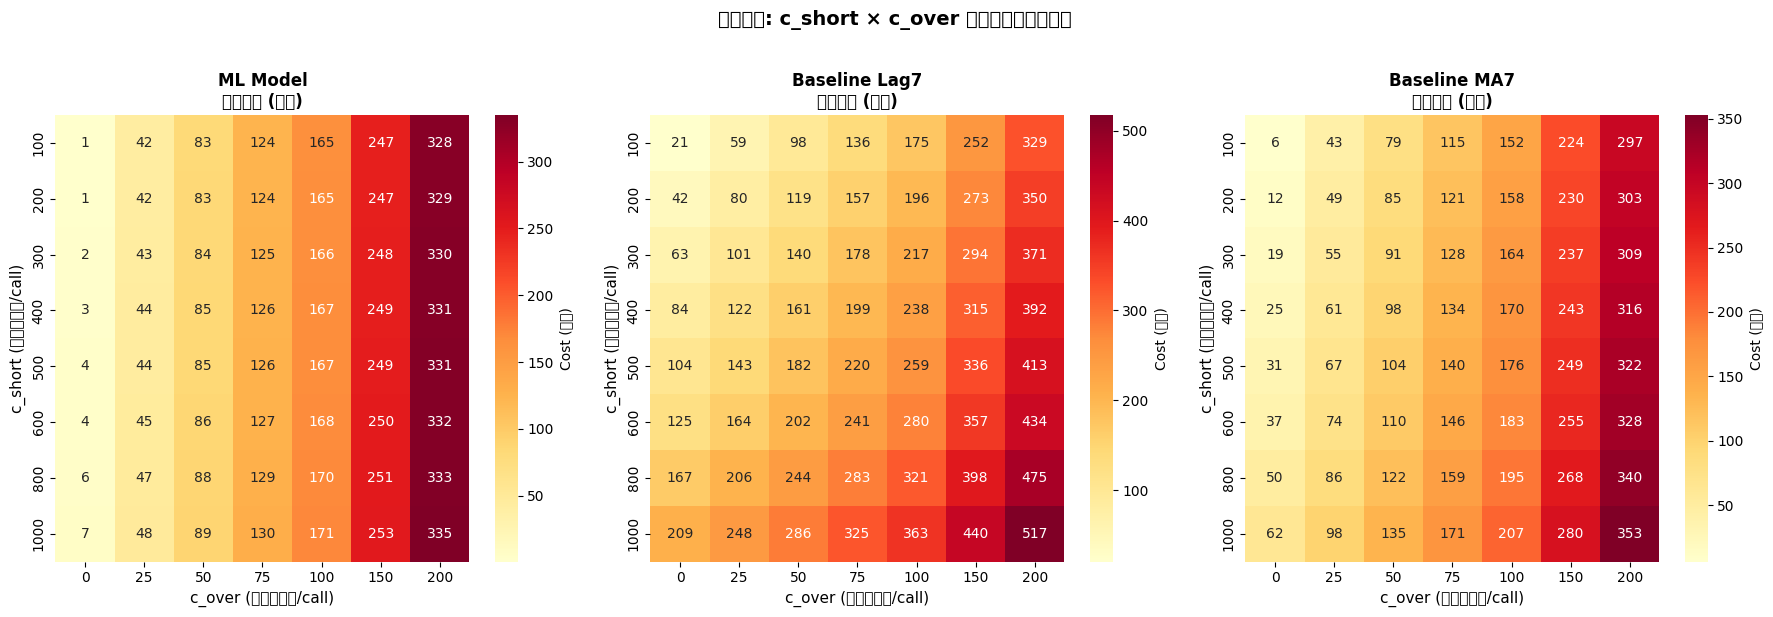

In [13]:
# =============================================================================
# ヒートマップ 1: 各モデルの総コスト
# =============================================================================

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# ML Model
ax = axes[0]
sns.heatmap(results_ml / 1000, annot=True, fmt='.0f', cmap='YlOrRd',
            xticklabels=C_OVER_LIST, yticklabels=C_SHORT_LIST, ax=ax,
            cbar_kws={'label': 'Cost (千円)'})
ax.set_xlabel('c_over (過剰コスト/call)', fontsize=11)
ax.set_ylabel('c_short (欠員コスト/call)', fontsize=11)
ax.set_title('ML Model\n総コスト (千円)', fontsize=12, fontweight='bold')

# Lag7
ax = axes[1]
sns.heatmap(results_lag7 / 1000, annot=True, fmt='.0f', cmap='YlOrRd',
            xticklabels=C_OVER_LIST, yticklabels=C_SHORT_LIST, ax=ax,
            cbar_kws={'label': 'Cost (千円)'})
ax.set_xlabel('c_over (過剰コスト/call)', fontsize=11)
ax.set_ylabel('c_short (欠員コスト/call)', fontsize=11)
ax.set_title('Baseline Lag7\n総コスト (千円)', fontsize=12, fontweight='bold')

# MA7
ax = axes[2]
sns.heatmap(results_ma7 / 1000, annot=True, fmt='.0f', cmap='YlOrRd',
            xticklabels=C_OVER_LIST, yticklabels=C_SHORT_LIST, ax=ax,
            cbar_kws={'label': 'Cost (千円)'})
ax.set_xlabel('c_over (過剰コスト/call)', fontsize=11)
ax.set_ylabel('c_short (欠員コスト/call)', fontsize=11)
ax.set_title('Baseline MA7\n総コスト (千円)', fontsize=12, fontweight='bold')

plt.suptitle('感度分析: c_short × c_over による総コスト比較', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(OUTPUT_DIR / '8_sensitivity_cost_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

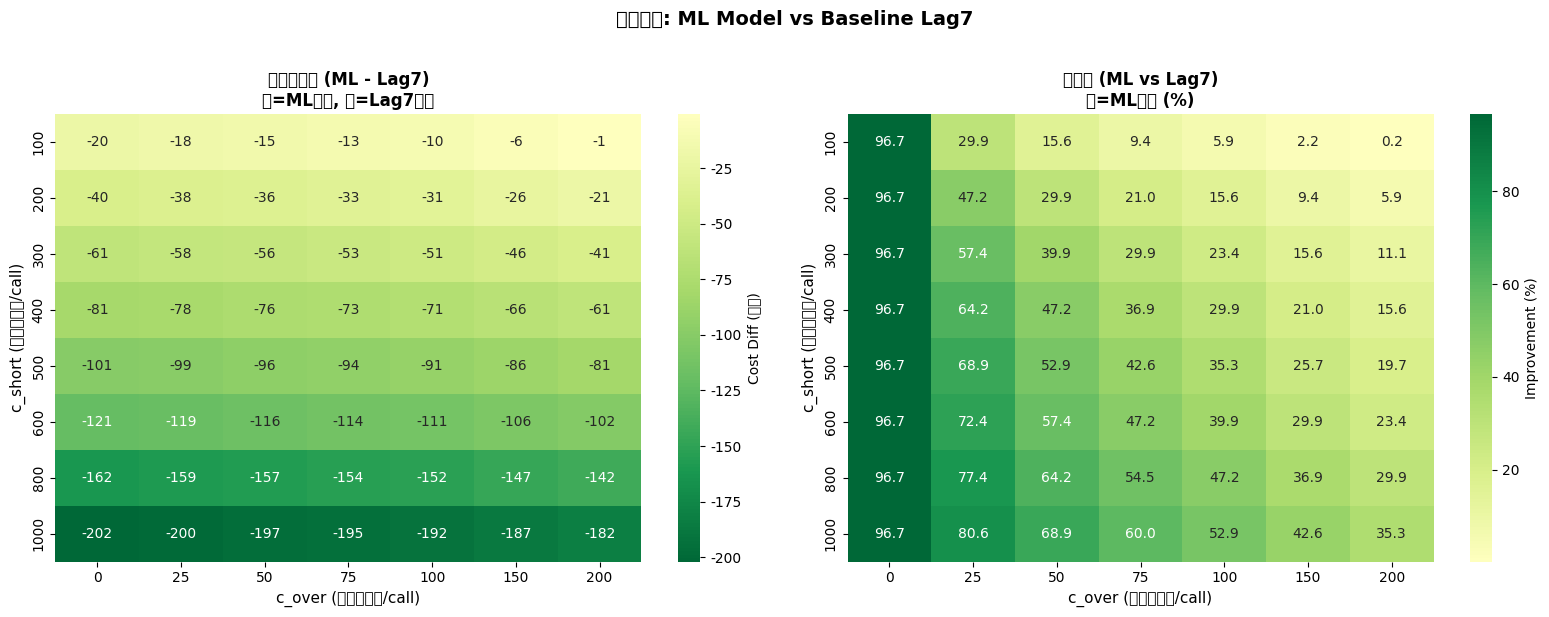


[改善率サマリー (ML vs Lag7)]
  最大改善率: 96.7% (c_short=100, c_over=0)
  最小改善率: 0.2% (c_short=100, c_over=200)
  平均改善率: 45.1%
  ML有利なシナリオ: 56/56 (100.0%)


In [14]:
# =============================================================================
# ヒートマップ 2: ML vs Lag7 改善率 (%)
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# コスト差分 (ML - Lag7): 負の値 = ML有利
ax = axes[0]
sns.heatmap(results_diff / 1000, annot=True, fmt='.0f', cmap='RdYlGn_r', center=0,
            xticklabels=C_OVER_LIST, yticklabels=C_SHORT_LIST, ax=ax,
            cbar_kws={'label': 'Cost Diff (千円)'})
ax.set_xlabel('c_over (過剰コスト/call)', fontsize=11)
ax.set_ylabel('c_short (欠員コスト/call)', fontsize=11)
ax.set_title('コスト差分 (ML - Lag7)\n緑=ML有利, 赤=Lag7有利', fontsize=12, fontweight='bold')

# 改善率 (%): 正の値 = ML有利
ax = axes[1]
sns.heatmap(results_improve, annot=True, fmt='.1f', cmap='RdYlGn', center=0,
            xticklabels=C_OVER_LIST, yticklabels=C_SHORT_LIST, ax=ax,
            cbar_kws={'label': 'Improvement (%)'})
ax.set_xlabel('c_over (過剰コスト/call)', fontsize=11)
ax.set_ylabel('c_short (欠員コスト/call)', fontsize=11)
ax.set_title('改善率 (ML vs Lag7)\n緑=ML有利 (%)', fontsize=12, fontweight='bold')

plt.suptitle('感度分析: ML Model vs Baseline Lag7', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(OUTPUT_DIR / '9_sensitivity_improvement_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

# 改善率のサマリー
print("\n[改善率サマリー (ML vs Lag7)]")
print(f"  最大改善率: {results_improve.max():.1f}% (c_short={C_SHORT_LIST[np.unravel_index(results_improve.argmax(), results_improve.shape)[0]]}, c_over={C_OVER_LIST[np.unravel_index(results_improve.argmax(), results_improve.shape)[1]]})")
print(f"  最小改善率: {results_improve.min():.1f}% (c_short={C_SHORT_LIST[np.unravel_index(results_improve.argmin(), results_improve.shape)[0]]}, c_over={C_OVER_LIST[np.unravel_index(results_improve.argmin(), results_improve.shape)[1]]})")
print(f"  平均改善率: {results_improve.mean():.1f}%")
print(f"  ML有利なシナリオ: {(results_improve > 0).sum()}/{results_improve.size} ({(results_improve > 0).sum()/results_improve.size*100:.1f}%)")

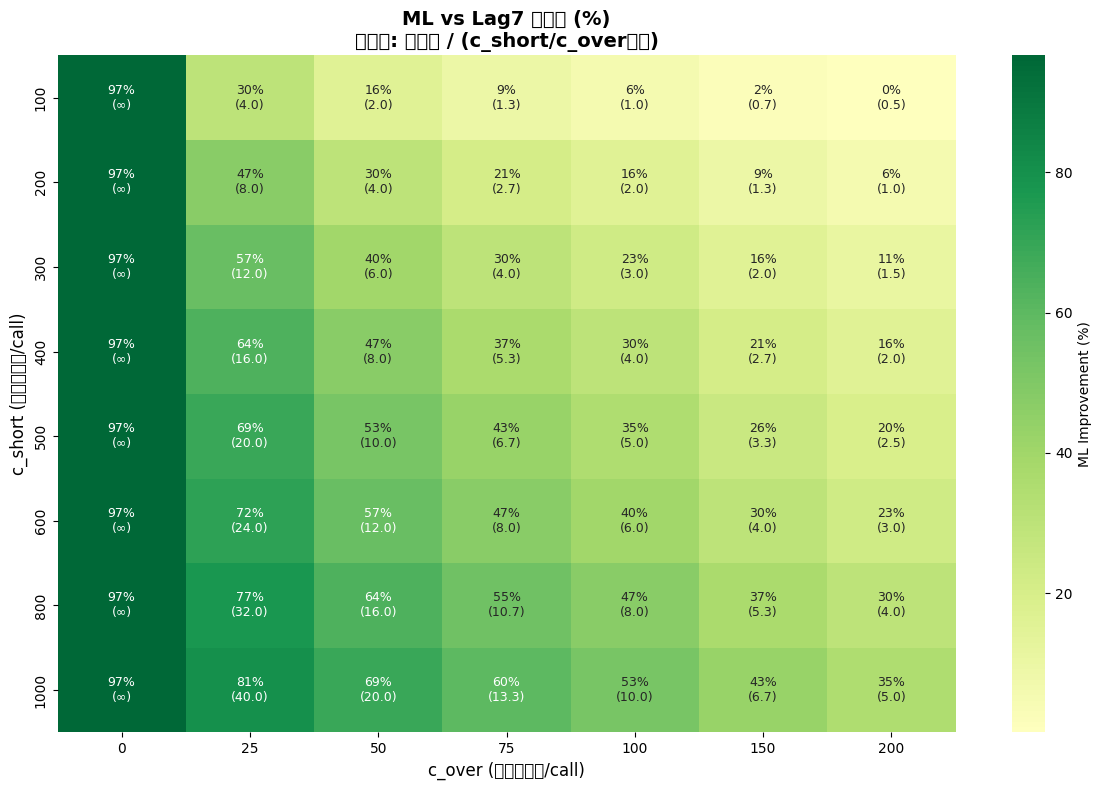


[分析結果]

【結論】
1. c_short (欠員コスト) が高いほど、MLモデルの優位性が増す
   → MLはShort Callsが少ないため

2. c_over (過剰コスト) が高いほど、MLモデルの優位性が減少
   → MLはOver Callsが多いため

3. c_short/c_over 比率が高い場合（欠員>過剰のコスト重視）
   → MLモデルが圧倒的に有利

4. 実務では通常 c_short >> c_over
   （顧客対応不可のコスト > 人件費余剰のコスト）
   → MLモデルの採用が合理的



In [15]:
# =============================================================================
# ヒートマップ 3: c_short/c_over 比率による分析
# =============================================================================

fig, ax = plt.subplots(figsize=(12, 8))

# c_short/c_over比率のアノテーション付きヒートマップ
annot_labels = np.empty_like(results_improve, dtype=object)
for i in range(len(C_SHORT_LIST)):
    for j in range(len(C_OVER_LIST)):
        ratio = C_SHORT_LIST[i] / C_OVER_LIST[j] if C_OVER_LIST[j] > 0 else float('inf')
        if ratio == float('inf'):
            annot_labels[i, j] = f'{results_improve[i,j]:.0f}%\n(∞)'
        else:
            annot_labels[i, j] = f'{results_improve[i,j]:.0f}%\n({ratio:.1f})'

sns.heatmap(results_improve, annot=annot_labels, fmt='', cmap='RdYlGn', center=0,
            xticklabels=C_OVER_LIST, yticklabels=C_SHORT_LIST, ax=ax,
            cbar_kws={'label': 'ML Improvement (%)'}, annot_kws={'fontsize': 9})
ax.set_xlabel('c_over (過剰コスト/call)', fontsize=12)
ax.set_ylabel('c_short (欠員コスト/call)', fontsize=12)
ax.set_title('ML vs Lag7 改善率 (%)\n各セル: 改善率 / (c_short/c_over比率)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(OUTPUT_DIR / '10_sensitivity_ratio_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n[分析結果]")
print("="*60)
print("""
【結論】
1. c_short (欠員コスト) が高いほど、MLモデルの優位性が増す
   → MLはShort Callsが少ないため

2. c_over (過剰コスト) が高いほど、MLモデルの優位性が減少
   → MLはOver Callsが多いため

3. c_short/c_over 比率が高い場合（欠員>過剰のコスト重視）
   → MLモデルが圧倒的に有利

4. 実務では通常 c_short >> c_over
   （顧客対応不可のコスト > 人件費余剰のコスト）
   → MLモデルの採用が合理的
""")

---
## 8. Cumulative Cost Comparison (累積コスト比較 - 詳細版)

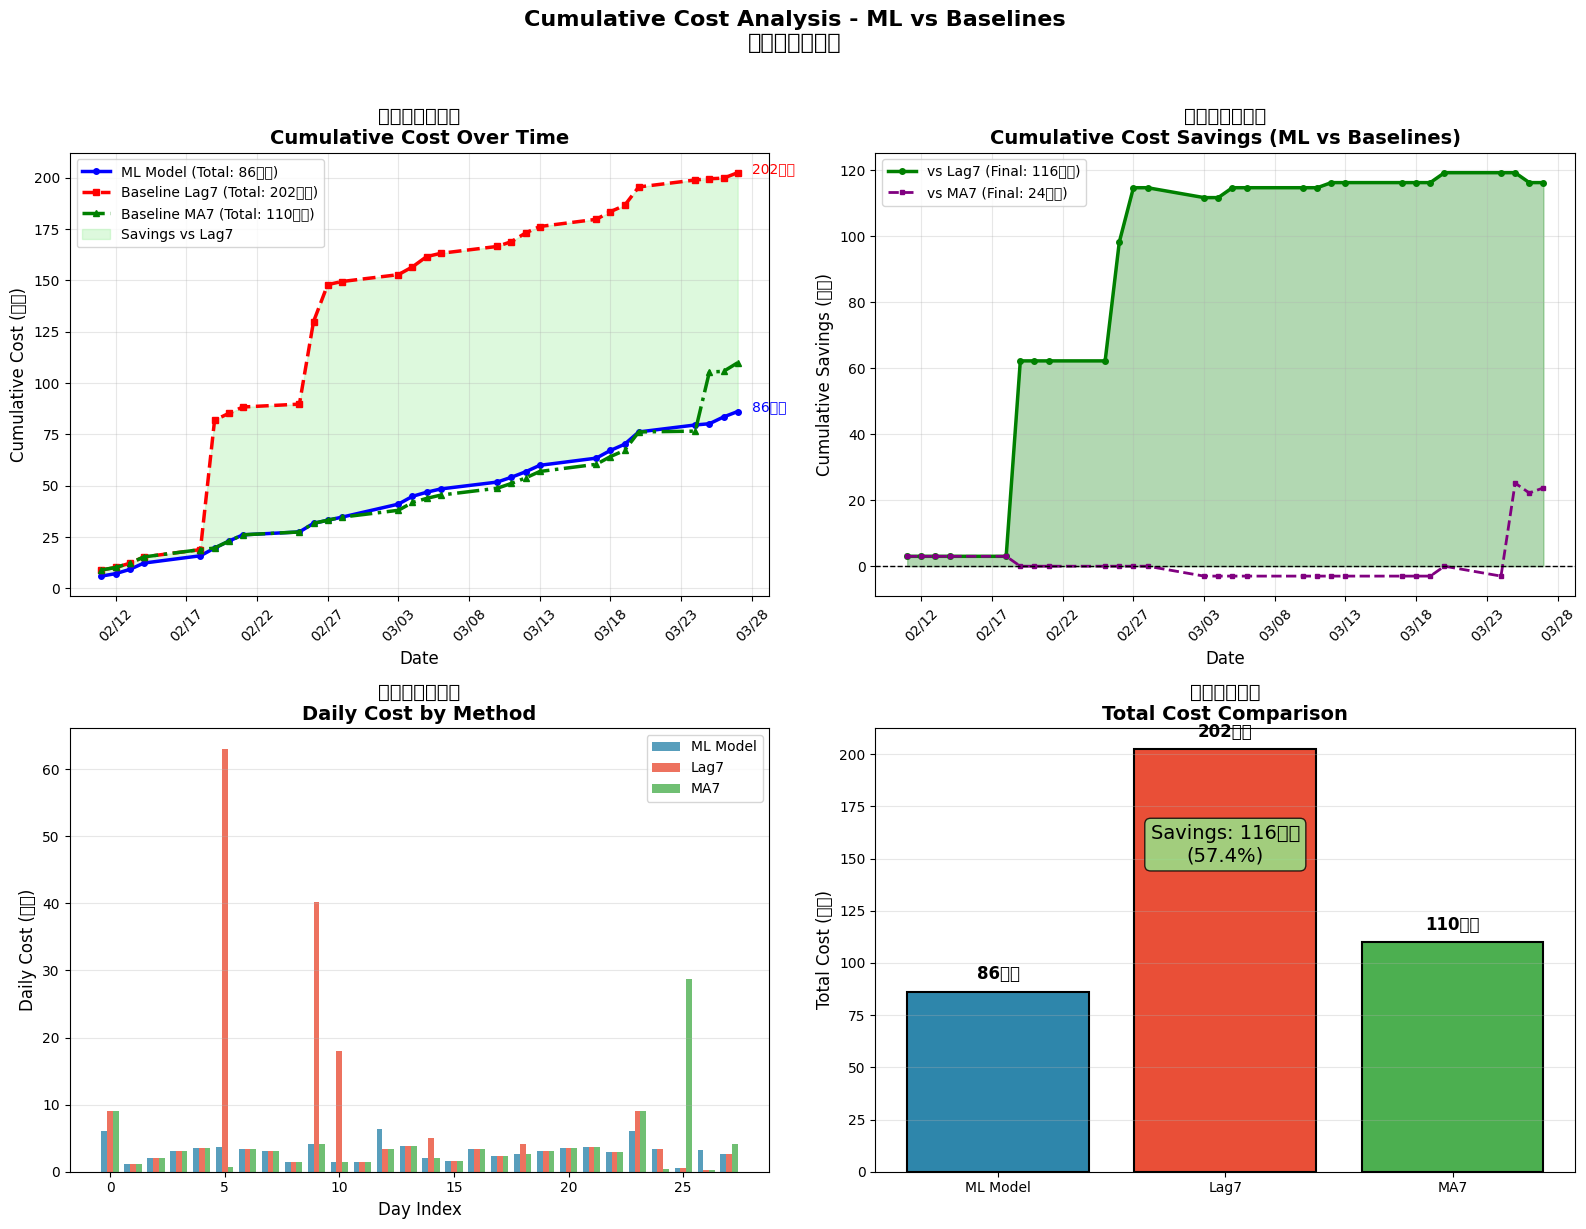

CUMULATIVE COST SUMMARY

[Total Cost]
  ML Model:         86,150 yen (    86 千円)
  Lag7:            202,450 yen (   202 千円)
  MA7:             109,900 yen (   110 千円)

[Savings (ML vs Lag7)]
  Total:           116,300 yen (   116 千円)
  Percentage:         57.4%
  Daily Avg:         4,154 yen/day
  Monthly Est:      83,071 yen/month (20営業日想定)


In [16]:
# =============================================================================
# Cumulative Cost Comparison - 単体詳細版
# =============================================================================

# 累積コスト計算
df['cum_cost_ml'] = df['cost_ml'].cumsum()
df['cum_cost_lag7'] = df['cost_lag7'].cumsum()
df['cum_cost_ma7'] = df['cost_ma7'].cumsum()

# 累積savings計算
df['cum_savings_vs_lag7'] = df['cum_cost_lag7'] - df['cum_cost_ml']
df['cum_savings_vs_ma7'] = df['cum_cost_ma7'] - df['cum_cost_ml']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# =============================================================================
# Plot 1: 累積コスト推移（メイン）
# =============================================================================
ax = axes[0, 0]
ax.plot(df['date'], df['cum_cost_ml'] / 1000, 'b-', linewidth=2.5, marker='o', markersize=4,
        label=f'ML Model (Total: {df["cost_ml"].sum()/1000:,.0f}千円)')
ax.plot(df['date'], df['cum_cost_lag7'] / 1000, 'r--', linewidth=2.5, marker='s', markersize=4,
        label=f'Baseline Lag7 (Total: {df["cost_lag7"].sum()/1000:,.0f}千円)')
ax.plot(df['date'], df['cum_cost_ma7'] / 1000, 'g-.', linewidth=2.5, marker='^', markersize=4,
        label=f'Baseline MA7 (Total: {df["cost_ma7"].sum()/1000:,.0f}千円)')

# Savings領域を塗りつぶし
ax.fill_between(df['date'], df['cum_cost_ml']/1000, df['cum_cost_lag7']/1000, 
                alpha=0.3, color='lightgreen', label='Savings vs Lag7')

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Cumulative Cost (千円)', fontsize=12)
ax.set_title('累積コスト推移\nCumulative Cost Over Time', fontsize=14, fontweight='bold')
ax.legend(loc='upper left', fontsize=10)
ax.grid(alpha=0.3)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.sca(ax)
plt.xticks(rotation=45)

# 最終日の値をアノテーション
final_date = df['date'].iloc[-1]
ax.annotate(f'{df["cum_cost_ml"].iloc[-1]/1000:.0f}千円', 
            xy=(final_date, df['cum_cost_ml'].iloc[-1]/1000),
            xytext=(10, 0), textcoords='offset points', fontsize=10, color='blue')
ax.annotate(f'{df["cum_cost_lag7"].iloc[-1]/1000:.0f}千円', 
            xy=(final_date, df['cum_cost_lag7'].iloc[-1]/1000),
            xytext=(10, 0), textcoords='offset points', fontsize=10, color='red')

# =============================================================================
# Plot 2: 累積Savings推移
# =============================================================================
ax = axes[0, 1]
ax.plot(df['date'], df['cum_savings_vs_lag7'] / 1000, 'g-', linewidth=2.5, marker='o', markersize=4,
        label=f'vs Lag7 (Final: {df["cum_savings_vs_lag7"].iloc[-1]/1000:,.0f}千円)')
ax.plot(df['date'], df['cum_savings_vs_ma7'] / 1000, 'purple', linewidth=2, marker='s', markersize=3,
        linestyle='--', label=f'vs MA7 (Final: {df["cum_savings_vs_ma7"].iloc[-1]/1000:,.0f}千円)')

ax.axhline(0, color='black', linestyle='--', linewidth=1)
ax.fill_between(df['date'], 0, df['cum_savings_vs_lag7']/1000, 
                where=(df['cum_savings_vs_lag7'] > 0), alpha=0.3, color='green')
ax.fill_between(df['date'], 0, df['cum_savings_vs_lag7']/1000, 
                where=(df['cum_savings_vs_lag7'] < 0), alpha=0.3, color='red')

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Cumulative Savings (千円)', fontsize=12)
ax.set_title('累積削減額推移\nCumulative Cost Savings (ML vs Baselines)', fontsize=14, fontweight='bold')
ax.legend(loc='upper left', fontsize=10)
ax.grid(alpha=0.3)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.sca(ax)
plt.xticks(rotation=45)

# =============================================================================
# Plot 3: 日次コスト比較
# =============================================================================
ax = axes[1, 0]
width = 0.25
x = np.arange(len(df))

ax.bar(x - width, df['cost_ml']/1000, width, label='ML Model', color='#2E86AB', alpha=0.8)
ax.bar(x, df['cost_lag7']/1000, width, label='Lag7', color='#E94F37', alpha=0.8)
ax.bar(x + width, df['cost_ma7']/1000, width, label='MA7', color='#4CAF50', alpha=0.8)

ax.set_xlabel('Day Index', fontsize=12)
ax.set_ylabel('Daily Cost (千円)', fontsize=12)
ax.set_title('日次コスト比較\nDaily Cost by Method', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=10)
ax.grid(alpha=0.3, axis='y')

# =============================================================================
# Plot 4: コストサマリー
# =============================================================================
ax = axes[1, 1]

methods = ['ML Model', 'Lag7', 'MA7']
totals = [df['cost_ml'].sum()/1000, df['cost_lag7'].sum()/1000, df['cost_ma7'].sum()/1000]
colors = ['#2E86AB', '#E94F37', '#4CAF50']

bars = ax.bar(methods, totals, color=colors, edgecolor='black', linewidth=1.5)
for bar, val in zip(bars, totals):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(totals)*0.02,
            f'{val:,.0f}千円', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Savings annotation
savings_lag7 = df['cost_lag7'].sum() - df['cost_ml'].sum()
savings_pct = savings_lag7 / df['cost_lag7'].sum() * 100
ax.annotate(f'Savings: {savings_lag7/1000:,.0f}千円\n({savings_pct:.1f}%)',
            xy=(0.5, 0.7), xycoords='axes fraction', fontsize=14, ha='center',
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

ax.set_ylabel('Total Cost (千円)', fontsize=12)
ax.set_title('総コスト比較\nTotal Cost Comparison', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3, axis='y')

plt.suptitle('Cumulative Cost Analysis - ML vs Baselines\n累積コスト分析', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(OUTPUT_DIR / '11_cumulative_cost_detailed.png', dpi=150, bbox_inches='tight')
plt.show()

# サマリー出力
print("="*70)
print("CUMULATIVE COST SUMMARY")
print("="*70)
print(f"\n[Total Cost]")
print(f"  ML Model:     {df['cost_ml'].sum():>10,.0f} yen ({df['cost_ml'].sum()/1000:>6,.0f} 千円)")
print(f"  Lag7:         {df['cost_lag7'].sum():>10,.0f} yen ({df['cost_lag7'].sum()/1000:>6,.0f} 千円)")
print(f"  MA7:          {df['cost_ma7'].sum():>10,.0f} yen ({df['cost_ma7'].sum()/1000:>6,.0f} 千円)")
print(f"\n[Savings (ML vs Lag7)]")
print(f"  Total:        {savings_lag7:>10,.0f} yen ({savings_lag7/1000:>6,.0f} 千円)")
print(f"  Percentage:   {savings_pct:>10.1f}%")
print(f"  Daily Avg:    {savings_lag7/len(df):>10,.0f} yen/day")
print(f"  Monthly Est:  {savings_lag7/len(df)*20:>10,.0f} yen/month (20営業日想定)")

In [17]:
# =============================================================================
# 感度分析結果をCSVに保存
# =============================================================================

# DataFrameに変換
sensitivity_df = []
for i, c_short in enumerate(C_SHORT_LIST):
    for j, c_over in enumerate(C_OVER_LIST):
        sensitivity_df.append({
            'c_short': c_short,
            'c_over': c_over,
            'ratio': c_short / c_over if c_over > 0 else np.inf,
            'cost_ml': results_ml[i, j],
            'cost_lag7': results_lag7[i, j],
            'cost_ma7': results_ma7[i, j],
            'cost_diff_ml_lag7': results_diff[i, j],
            'improve_pct': results_improve[i, j]
        })

sensitivity_df = pd.DataFrame(sensitivity_df)
sensitivity_df.to_csv(OUTPUT_DIR / 'sensitivity_analysis.csv', index=False)
print(f"Saved: {OUTPUT_DIR / 'sensitivity_analysis.csv'}")
print(f"\nSensitivity Analysis Table:")
print(sensitivity_df.to_string(index=False))

Saved: ../output/call_result/sensitivity_analysis.csv

Sensitivity Analysis Table:
 c_short  c_over     ratio  cost_ml  cost_lag7  cost_ma7  cost_diff_ml_lag7  improve_pct
     100       0       inf    700.0    20900.0    6200.0           -20200.0    96.650718
     100      25  4.000000  41675.0    59425.0   42550.0           -17750.0    29.869584
     100      50  2.000000  82650.0    97950.0   78900.0           -15300.0    15.620214
     100      75  1.333333 123625.0   136475.0  115250.0           -12850.0     9.415644
     100     100  1.000000 164600.0   175000.0  151600.0           -10400.0     5.942857
     100     150  0.666667 246550.0   252050.0  224300.0            -5500.0     2.182107
     100     200  0.500000 328500.0   329100.0  297000.0             -600.0     0.182315
     200       0       inf   1400.0    41800.0   12400.0           -40400.0    96.650718
     200      25  8.000000  42375.0    80325.0   48750.0           -37950.0    47.245565
     200      50  4.000000 